Dropdown(description='Query ID:', index=371, options=('Select', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

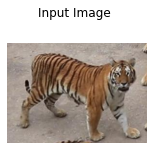

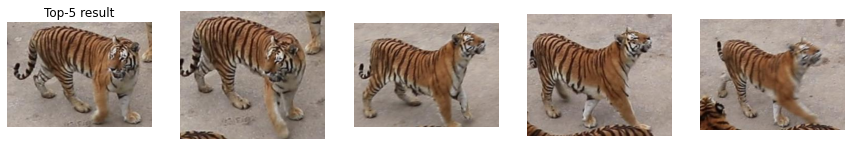

In [1]:
import json
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import ipywidgets as widgets
from os import listdir
from os.path import isfile, join
import csv
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.image import imread
from matplotlib.pyplot import figure, imshow, axis
from PIL import Image   

with open("submission_plain.json", "r") as read_it: 
     data = json.load(read_it) 
count=0


def showInputImage(list_of_files):
    image = imread("reid_test\\"+list_of_files[0])
    fig = figure()

    fig.clear()
    fig.set_figheight(2.5)
    fig.set_figwidth(2.5)
    fig.suptitle('Input Image', fontsize=12)

    imshow(image)
    axis('off')
        
    list_of_files = list_of_files[1:]
    showImagesHorizontally(list_of_files)
    
def showImagesHorizontally(list_of_files):
     
    fig = figure()
    fig.clear()
    fig.set_figheight(15)
    fig.set_figwidth(15)

    number_of_files = len(list_of_files)

    for i in range(number_of_files):
        

        a=fig.add_subplot(1,number_of_files,i+1)
        if i==0:
            a.title.set_text("Top-5 result")
        image = imread("reid_test\\"+list_of_files[i])
        

        imshow(image)
        axis('off')
    
w = widgets.Dropdown(
    options=['Select',1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372],
    value='Select',
    description='Query ID:',
)
def on_change(change):
    
    clear_output()
    display(w)
    if change['type'] == 'change' and change['name'] == 'value':
        output_file = pd.read_csv("reid_output.csv",names=["ID","Name"])
        file_name=output_file.iat[int(change['new'])-1,1]
        l1=[file_name]
        id_value = str(l1[0])
        for query in data:
            if query.get("query_id")==int(id_value):
                top_5=[]
                count=0
                temp=[]
                for id in query.get("ans_ids"):
                    s=""
                    count+=1
                    if len(str(id))==1:
                        s="00000"+str(id)+".jpg"
                    elif len(str(id))==2:
                        s="0000"+str(id)+".jpg"
                    elif len(str(id))==3:
                        s="000"+str(id)+".jpg"
                    elif len(str(id))==4:
                        s="00"+str(id)+".jpg"
                    elif len(str(id))==5:
                        s="0"+str(id)+".jpg"
                    else:
                        s=str(id)+".jpg"

                    temp.append(s)
                    if count==6:
                        top_5.append(temp)
                        break
                showInputImage(top_5[0])


w.observe(on_change)

display(w)
